## Mécanique du vol, 2022-2023
#### Université Paul Sabatier, ENSEEIHT

Auteur: Christophe.Airiau@imft.fr

<table style="width: 100%">
    <colgroup>
       <col span="1" style="width: 40%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 45%;">
    </colgroup>
    <tbody>
        <tr>
            <td style="background-color: #ffffff"><img src="Images/fsi.png" width="200"></td>
            <td style="background-color: #ffffff"> </td>
            <td style="background-color: #ffffff"><img src="Images/N7.png" width="200"></td>
        </tr>
    </tbody>
</table>
 
 



# **<span style="color:orange">Physique du vol: atmosphère, pression, vitesse d'un avion</span>**


Vous êtes un ingénieur, et vous devez écrire un programme embarqué pour calculer la vitesse d'un avion. Ce programme sera
entré dans l'ordinateur de bord. 

Comment faire ?  Quelles informations sont utiles ?

 <img src="Images/screen.png" width="600">


# Références  

1. [*Gudmundsson*]: S. Gudmundsson. **General aviation aircraft design: applied methods and procedures**. Elsevier, 2014.

2. [*Dole*]: E. Dole, J. E. Lewis, J. R. Badick, B. A. Johnson. **Flight theory and aerodynamics**, 2rd edition, Wiley, 2017

3. [*Roskam*]: J. Roskam, C.-T. E. Lan. **Airplane aerodynamics and performance**. DARcorporation. 1997
4. Pilot's Handbook of Aeronautical Knowledge, Federal Aviation Administration, FAA-H-8083-25B, 2016
5. http://www.luizmonteiro.com/Altimetry.aspx#TrueAirspeed
6. https://en.wikipedia.org/wiki/Calibrated_airspeed
7. https://en.wikipedia.org/wiki/Airspeed_indicator
8. https://en.wikipedia.org/wiki/True_airspeed
9. https://agodemar.github.io/FlightMechanics4Pilots/mypages/airspeeds/
10. https://www.lavionnaire.fr/InstVolMach.php

# Introduction

On pourrait croire que c'est simple de déterminer la vitesse d'un avion en vol.  

En fait non, il a trop de variations possibles, entre altitude, masse volumique, température, pression, 
valeur de la gravité, ... en fonction de la position sur Terre, de la météo, des courants aériens etc ...

Il y a toujours des incertitudes sur la vitesse, mais aussi sur la position exacte.

Il faut prendre en compte des corrections de compressibilité

On va voir celà maintenant, c'est un peu compliqué. On n'étudiera pas toutes les situations malgré tout !

On utilise ici les relations qui sont intégrées dans les ordinateurs de bord des avions modernes.

Dans la suite on utilisera le module que j'ai créé qui s'appelle `flight`
 
# **<span style="color:red">Objectifs</span>**

1. Comprendre le modèle atmosphère
2. Comprendre les différentes pressions et vitesses
3. Retrouver la vitesse vraie
4. Comprendre la mesure de vitesse pour un avion supersonique
 
<div class="alert alert-block alert-danger">
<b>ATTENTION </b>
    
Le TP est très long, il faudra certainement le continuer à la maison.
</div> 

Les questions sont indiquées en couleur <span style="color:magenta">magenta</span>.
Il est demandé d'écrire les réponses dans ce fichier. 
On pourra toujours ajouter une cellule "Markdown" pour des commentaires supplémentaires.
 
<div class="alert alert-block alert-danger">
<b>PYTHON </b>
    
Ouvrir les fichiers source Python dans notebooks ou vscode ou spyder, ou ...

Il faudra aller récupérer des méthodes (fonctions) dans la suite.
</div> 

# **<span style="color:red">I - Atmosphère avion</span>**


##  **<span style="color:blue">I-1 Les constantes </span>**

D'abord il faut donner les constantes utiles, pour les gaz en général, pour l'air et pour la gravité. 
Ici on met de la précision. 

Regarder le code Python

**Constantes pour l'atmosphère**:

In [1]:
### imports and local module 
import numpy as np
import matplotlib.pyplot as plt
from flight.flight_physics import *
%matplotlib notebook
%matplotlib inline

r de l'air    : 287.0521
p_ref /r      : 352.9847


In [2]:
# Exemple d'implémentation demandées dans la suite
r_ref, k_T, p_ref  = define_constantes()
print("k_T", k_T)

r de l'air    : 287.0521
p_ref /r      : 352.9847
k_T -0.0065


On remarque que l'appel du module lance automatiquement le calcul des constantes de l'air.

##  **<span style="color:blue">I-2 Modèle de l'atmosphère standard </span>**


L'air étant un gaz parfait il obéit à la loi:

<div class="alert alert-block alert-danger">
<b>Loi d'état des gaz parfaits </b>
$$ p = \rho r T $$
</div>

L'atmosphère de référence ISA est donnée au niveau de la mer avec:

* une température de $15^\circ$~C.
* une pression atmosphérique de $p_0 = 101 325$ Pa. 
 

L'atmosphère comprend différentes couches. La plupart des avions volent en dessous de 11 000 m.
Dans cette couche la températude varie de -6.5 degrés Celcius par kilomètres qu'on note $k_T$

Après intégration de la pression hydrostatique en prenant en compte les variations de température en fonction de l'altitude $h$ en mètre:
on trouve :

<div class="alert alert-block alert-info">
<b> Atmosphère standard pour $h \leqslant 11~000$ m </b>

$$
 \dfrac{T}{T_0}= \Theta = 1 + \kappa h, \qquad \kappa = \dfrac{k_T}{T_{ref}+15}
$$
 
$$
 \dfrac p p_0 = \delta = (1 + \kappa h)^{5.2561}, \qquad  \qquad   \dfrac \rho \rho_0 = \sigma = (1 + \kappa h)^{4.2561}
$$
avec l'altitude $h$ en m.


L'exposant pour la pression est donné par:
$$n = \dfrac{-g_0}{r k_T} $$

</div>    
    
**Dans la suite je n'ai pas implémenté l'atmosphère pour une altitude supérieure à 11 000 m**, mais ce n'est pas difficile.    
    
###  **<span style="color:magenta">Vérifier la valeur numérique de l'exposant</span>**

In [3]:
# calcul de n:
# to do 

# Solution manuelle
# from flight.general import g_ref, R_ref, T_ref
# n = -g_ref / (r_ref * k_T)
#print("n      : %.5f" % n)

# Solution avec la fonction set_exponents
n, m = set_exponents(r_ref, k_T)


n      : 5.25589
m      : 34.16331 	 Gudmundsson:  34.163195


* Expliquer la différence ici:
   
   **Réponse:**
   
   Les valeurs sont différentes car les variables utilisées dans le calcul dépendent de l'altitude.
   


* Pourquoi on a $n-1$ comme exposant pour la masse volumique ?

   **Réponse:**
   
   Cela vient de la loi des gaz parfaits, la masse volumique vaut $$ \rho = \dfrac{p}{r T}  $$ d'où (d'après les fromules ci_dessus) : $$ \dfrac{\rho}{\rho _0} = \dfrac{(1 + \kappa h)^n}{1 + \kappa h} $$ 


###  **<span style="color:magenta">Calculer la masse volumique $ \rho _0 $ à 0.001 près </span>**

In [4]:
# to run only
p_0, T_0, rho_0 = set_sea_level_state(r_ref, t_0=15)
display_state("sea level", p_0, rho_0, T_0, sound_velocity(T_0))

rho_0    1.225 kg/m^3

# 	 sea level
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 101325.00     1.2250       340.29    288.15      15.00 


###  **<span style="color:magenta">Calculer les rapports, la température, masse volumique, la pression à 8000 m d'altitude</span>**

1. On trouve sur internet des calculateurs, prendre l'exemple ci-dessous et donner les valeurs récupérées

https://www.translatorscafe.com/unit-converter/fr-FR/calculator/altitude/

$$\rho =   0.5258 ~kg/m^3 \qquad p = 35.652~kPa \qquad T = 236.2 ~K \qquad T = -36.9~ °C  $$

2. Utiliser la fonction donnée précédemment et coder dans le cadre ci-dessous, pour retrouver les rapports $\Theta, \delta$ et $\sigma$ et calculer $T$, $p$ et $\rho$.

3. Retrouve-t-on les valeurs de la table d'internet ? 
    
    **Réponse:**
    
    On retrouve les valeurs de la table d'internet à 3 chiffres significatifs près, toujours en raison des légères variations possibles des variables.
    

In [5]:
# to do

# Utilisation de la fonction atmos pour calculer les rapports

theta , delta, sigma = atmos(8000)    
print("theta :", theta)
print("delta :", delta)
print("sigma :", sigma)

# Comparaison des résulats

T_8 = T_0 * theta
p_8 = p_0 * delta
rho_8 = rho_0 * sigma

print("T :", T_8)
print("p :", p_8)
print("rho :", rho_8)

theta : 0.8195384348429637
delta : 0.35134157116149733
sigma : 0.42870664293959543
T : 236.14999999999998
p : 35599.68469793872
rho : 0.5251670888649894


Le code Python fourni sur le site officiel de l'atmosphère standard donne:
$$
\sigma = 0.4292,\qquad \delta = 0.3519 
$$


**Commentaires ?**

De nouveau, on obtient les mêmes valeurs à $10^{-3}$ près.


##  **<span style="color:blue">I-3 Déviation de l'atmosphère standard </span>**

* La température réelle dévie de celle de l'atmosphère standard. On peut le prendre en compte en corrigeant la température et on peut écrire pour le masse volumique:

<div class="alert alert-block alert-info">
<b> Correction en température de l'atmosphère ISA </b>

$$
\rho = \dfrac{p}{r T} =  \dfrac{p_0}{r}  \dfrac{(1 + \kappa h)^n}{T+\Delta T_{ISA}} = \dfrac{352.6~(1 + \kappa h)^{5.2571}}{T+\Delta T_{ISA}}
$$
 </div>
Gundmundsson a pris r = 286.9  alors qu'on utilise r = 287.05

* Prise en compte du taux d'humidité:

<div class="alert alert-block alert-info">
<b> Correction due à l'humidité </b>
    
$$
\rho = \rho_{std}\dfrac{1 + x}{1 +1.609 x}
$$
    
* Air sec : $x=0$,  Pluie   : $x=1$
    
* $ \rho_{std}$ est la masse volumique calculée par temps sec
 </div>
 
 ###  **<span style="color:magenta">Tracer le taux d'humité. </span>**

Quelle est la correction en cas de pluie ?

Quelle est la correction pour x=0.5 ?

Quelle est le taux d'hummidité pour une correction de 0.8 ?
  

0.696378830083565


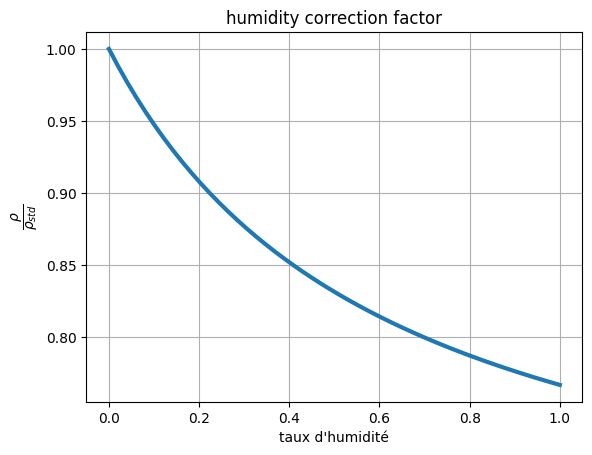

In [6]:
# to do 

x, r = 0.5, 0.8

x = np.linspace(0, 1)
plt.figure()
plt.plot(x, humidity(x), lw=3)
plt.xlabel("taux d'humidité")
plt.ylabel(r"$\dfrac{\rho}{\rho_{std}}$")
plt.grid()
plt.title("humidity correction factor")

# taux d'humidité pour une correction de 0.8:
print(density2humidity(0.8))

**Commentaires ?**

En x=0, pas d'humidité, il n'y a pas de correction. \
En x=1, il pleut donc l'humidité est maximum et on remarque que l'impact du facteur de correction est maximum puisque le rapport est minimum.\
Finalement, le taux d'humidité est de 0.7 pour une correction de 0.8.

Plus le taux d'humidité est important, plus la correction est importante.


## **<span style="color:blue">I-4 Applications numériques pour deux avions</span>**


On considère 2 avions qui volent à une altitude de 8000 m telles que les données atmosphériques sont:
$$
\sigma = 0.4292,\qquad \delta = 0.3519   \qquad \sigma = \dfrac \rho \rho_0, \qquad \delta  = \dfrac p p_0
$$

* l'avion 1, qui vole en subsonique à une vitesse de 500 km/h
* l'avion 2 vole en supersonique à un nombre de Mach de 1.5


###  **<span style="color:magenta"> Calculer la vitesse du son au niveau du sol et à l'altitude de 8000 m, ainsi que la pression, la masse volumique, la température  et la vitesse du son</span>** 

On pourra récupérer des résultats calculés plus haut

*Utiliser des listes pour les variables l'indice 0 pour l'avion 1 et l'indice 1 pour l'avion 2.*
 

In [7]:
sigma, delta = 0.4292, 0.3519
# to do  
altitude = [0,8000]
T = [T_0 , T_8]
print(T)
a = [sound_velocity(k) for k in T]
print(a)
p = [p_0, p_8]
rho = [rho_0 , rho_8]

# not to change, for displaying
msg = (0, 8000)
for i in range(2):
    s = "h =  " + str(msg[i]) + " m"
    display_state(s, p[i], rho[i], T[i], a[i])

[288.15, 236.14999999999998]
[340.29352035335023, 308.0621503820112]

# 	 h =  0 m
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 101325.00     1.2250       340.29    288.15      15.00 

# 	 h =  8000 m
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 35599.68     0.5252       308.06    236.15     -37.00 


**Commentaires ?**

On retrouve des résultats cohérents, la presssion diminue avec l'altitude, tout comme la densité de l'air, la vitesse du son et la température. 


###  **<span style="color:magenta"> Calculer pour les deux avions la pression dynamique, le nombre de Mach et la vitesse, suivant le cas</span>**
 

$$
q =  \dfrac{1}{2} \rho V^2 = \dfrac{1}{2} \rho M^2 \dfrac{\gamma p}{\rho} = \dfrac{\gamma p M^2}{2}
$$


In [8]:
# Avion 1:
V = [500 / 3.6, 0]
M, q = [0, 1.5], []

M[0] = V[0] / a[0]
V[1] = M[1] * a[1]

# to do
q = [dynamic_pressure(rho[i],M[i],V[i],p[i]) for i in range(2)]
print("q",q)
print("M",M)
print("v",V)
 


q [11815.233267887692, 56069.50339925348]
M [0.408144382957016, 1.5]
v [138.88888888888889, 462.09322557301687]


**Commentaires ?**

Plus la vitesse de l'avion est importante, plus la pression dynamique etst élevée.


# **<span style="color:red">II - Les pressions</span>**

On utilise plusieurs types de pression, il est important de connaître leur signification et emploi:

### Pression statique

c'est la pression thermodynamique

### Pression dynamique

Elle prend en compte la vitesse de l'air.

<div class="alert alert-block alert-danger">
<b>Pression dynamique </b>
    $$
    q =  \dfrac{\gamma p M^2}{2} =  \dfrac{1}{2} \rho V^2 
    $$ 
</div>

###  Pression totale

<div class="alert alert-block alert-danger">
<b>Pression totale </b>
    \begin{equation}
    p_t(M) = p(M) + q(M) = p \left(1 + \dfrac{\gamma}{2} M^2\right)
    \label{eq:pt} \tag{$p_t$ def.}
    \end{equation}
</div>  
  
  Normalement cette définition devrait être valable tout nombre de Mach. Mais ...

### Pression isentropique
<div class="alert alert-block alert-danger">
<b>Pression isentropique </b>
    $$
    p_i = p \left(1+\dfrac{\gamma-1}{2}M^2\right)^\dfrac{\gamma}{\gamma-1}
    $$
</div>  

### Pression d'arrêt

C'est la pression lorsque en un point de l'écoulement la **vitesse relative est nulle**.

<div class="alert alert-block alert-danger">
<b>Pression d'arrêt </b>
    
* La pression d'arrêt est la pression isentropique 

* On la nomme aussi très souvent pression totale car  $p_i = p_t(M=0)$
</div>  

### Pression dynamique compressible 

On la trouve parfois sous la notation $\Delta p$.

Elle est donnée en fonction de la pression isentropique par:

<div class="alert alert-block alert-danger">
<b>Pression dynamique compressible </b>
$$
q_c = p_i -p = \Delta p
\label{eq:qc} \tag{éq. $q_c$ def.}
$$
</div>

Cette notion n'existe pas en aérodynamique fondamentale. Elle a été créée pour la mécanique du vol.

On l'appelle aussi **pression d'impact**

C'est une différence de pression mesurée en vol par les instruments, on l'appelle parfois $\Delta p$, et cela a plus de sens. On alors la relation
    
<div class="alert alert-block alert-success">
<b> $q_c$   à partir du Mach et de la pression statique</b>
$$
q_c =  p \left[ \left(1+\dfrac{\gamma-1}{2}M^2\right)^\dfrac{\gamma}{\gamma-1}-1\right]
 \label{eq:qc_value} \tag{éq. $q_c$}
$$
</div>

On verra plus loin que cette pression $q_c$ n'est exactement égale à la pression dynamique $q$ que uniquement lorsque 
la vitesse tend vers 0.

Cela revient à assimiler $p_t$  à $p_i$, donc **à la pression au point d'arrêt**. 

Au final dans les livres on considère $p_t$ comme une constante égale à $p_i$ et on oublie l'équation \eqref{eq:pt}.

* Dans un écoulement où les évolutions thermodynamiques sont à **entropie constante** la quantité **$p_i$ est conservée**

**Remarque:** 

Parfois on trouve la pression notée $p_s$: il faut faire attention, soit   la pression statique $p$, qu'il ne faut pas confondre avec  la pression d'arrêt $p_i$ (*stagnation pressure*) !


###  **<span style="color:magenta">Calculer les rapports ci-dessous et comparer à   2.5, 5 et 2/7.</span>**
  
Ces rapports, et d'autres, interviennent souvent en aérodynamique compressible. Dans les livres de mécanique du vol, on trouve plus souvent les formules avec les valeurs numériques, que les formules avec les exposants écrits littérallement. 

Il faut faire l'application numérique au moins une fois.
  
$$
r_1 = \dfrac{1}{\gamma-1}, \qquad r_2 = \dfrac{2}{\gamma-1}, \qquad  r_3 = \dfrac{\gamma-1}{\gamma}, \qquad r_2 = \dfrac{1}{r_3} 
$$
 

In [9]:
# just to run
pressure_exponents()

print("2/7 =", 2/7)


Pressure exponents
1 / (γ-1) : 2.50
2 / (γ-1) : 5.00
(γ-1) / γ : 0.28571
γ / (γ-1) : 3.50
2/7 = 0.2857142857142857


**Commentaires ?**

On retrouve exactement les valeurs attendues.


###  **<span style="color:magenta">Calcul des pressions pour l'Avion 2 </span>**

* On vérifiera notamment que dans l'absolue $p_t$ est différente de $p_i$ (équivalent à dire que $q$ est différente de $q_c$)
* On utilisera les fonctions données dans le module `flight.flight_physics`
* **utiliser les listes créer dans la partie I-4** 

**Calculer:** $p_i/p$, $q(M)$, $q_c(M)$, $p_i$, $p_t$

In [10]:
# just to run and make a comment
pt = [0,  p[1] + q[1]]
pi = [0,  pi_sur_p(M[1]) * p[1]]
print("Avion 2 : vérification")
print("p + q     : %.2f Pa" % (p[1] + q[1]))
print("q         : %.2f Pa  %.2f Pa " % (q_from_Mach(M[1], p[1]), q[1]))
print("qc        : %.2f Pa" % qc_from_Mach(M[1], p[1]))
print("pt/p      : %.3f " % (pt[1] / p[1]))
print("pi/p      : %.3f " % (pi[1] / p[1]))

Avion 2 : vérification
p + q     : 91669.19 Pa
q         : 56069.50 Pa  56069.50 Pa 
qc        : 95087.85 Pa
pt/p      : 2.575 
pi/p      : 3.671 


**Commentaires**

...


###  **<span style="color:magenta">A partir de quel Mach l'erreur sur $p_t$ par rapport à $p_i$ est supérieure à 5% ?</span>**

On a souvent tendance à confondre la pression totale et la pression isentropique. Les deux peuvent varier en fonction des conditions d'écoulements, mais dans des circonstances différentes. 

Malgré tout, elles sont souvent assimilées l'une à l'autre. Il faut évaluer l'erreur commise:
<div class="alert alert-block alert-info">
<b> Erreur sur la pression totale</b>
$$
\varepsilon = \dfrac{p_t - p_i}{p_i}  = \dfrac{q - q_c}{p_i}  =\dfrac{p_t}{p_i} - 1 = \frac{1 + \dfrac{\gamma}{2} M^2}{\left(1+\dfrac{\gamma-1}{2}M^2\right)^\dfrac{\gamma}{\gamma-1}}
$$
</div>

On propose aussi une autre erreur sur les pressions dynamique:
<div class="alert alert-block alert-info">
<b> Erreur sur les pressions dynamiques</b>
$$
\varepsilon_q = \sqrt{\dfrac{q_c - q}{q}} \approx k M^2 
$$
</div>

Pour des nombres de Mach faible un développement limité à l'ordre 2 de l'erreur  $\varepsilon_q$  donne:
$$
\varepsilon_q = \dfrac{M^2}{4} + \mathcal{O}(M^2)
$$

**Tracer aussi cette erreur.**

**Réponse:**

Mach = 0.8

**En mécanique du vol cela implique de faire des corrections de compressibilité**

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 ]),
 array([0.00000000e+00, 1.74989478e-09, 2.79932814e-08, 1.41673484e-07,
        4.47570204e-07, 1.09211107e-06, 2.26310839e-06, 4.18942178e-06,
        7.14054739e-06, 1.14261346e-05, 1.73954316e-05, 2.54366607e-05,
        3.59763248e-05, 4.94784476e-05, 6.64437476e-05, 8.74087489e-05,
        1.12944831e-04, 1.43657219e-04, 1.80183916e-04, 2.23194582e-04,
        2.73389361e-

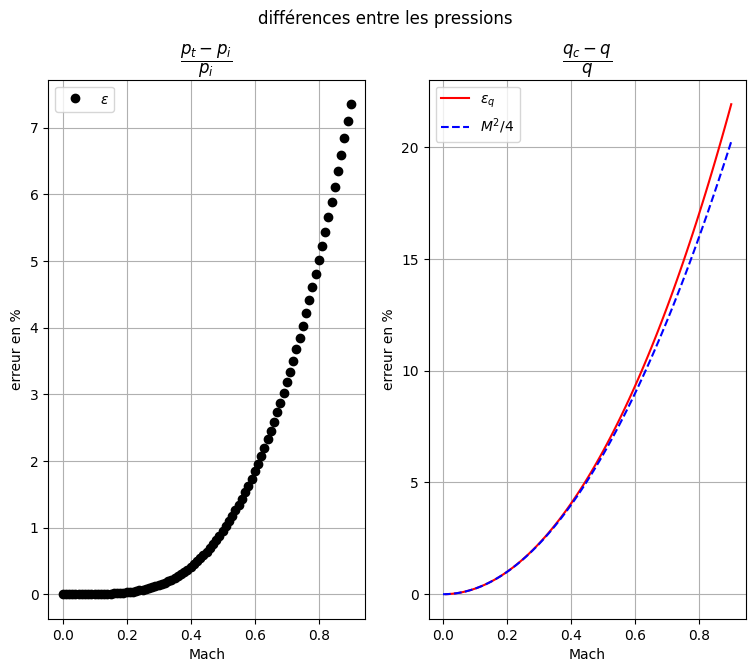

In [11]:
# to do
plot_errors()


###  **<span style="color:magenta">Calculer des pressions dynamiques</span>**

Pour résoudre les vitesses, on a besoin de calculer des pression dynamique.
Le sujet a été abordé plus haut. Testons la fonction implémentée avec trois méthodes pour le calcul de $q$.


Calculer les pressions dynamiques pour les cas suivant:

1. $\rho = 1, U = 100$
2. $M=0.5$ et $p=35 000$ Pa:

    a. à partir de la définition de $q$
    
    b. en supposant une évolution isentropique
3. Identique à la question 2, mais avec $M=1.5$

**Conclusions**:

On retrouve logiquement que la pression dynamique est directement liée à la vitesse, plus elle est élevée, plus la pression dynamique est élevée.

**Remarques** 

Dans le module `aerodynamics`, il y a plusieurs méthodes pour calculer les pressions dynamiques, il y a des "recopies" de codes

In [12]:
# to do

q_qst1 = dynamic_pressure(rho=1, M=0, U=100, p=0, pi=False, gamma=1.4)
print("q_qst1", q_qst1)

q_qst2a = dynamic_pressure(rho=0, M=0.5, U=0, p=35000, pi=False, gamma=1.4)
print("q_qst2a", q_qst2a)
q_qst2b = dynamic_pressure(rho=0, M=0.5, U=0, p=35000, pi=True, gamma=1.4)
print("q_qst2b", q_qst2b)

q_qst3 = dynamic_pressure(rho=0, M=1.5, U=0, p=35000, pi=False, gamma=1.4)
print("q_qst3a", q_qst3)
q_qst3b = dynamic_pressure(rho=0, M=1.5, U=0, p=35000, pi=True, gamma=1.4)
print("q_qst3b", q_qst3b)


q_qst1 5000.0
q_qst2a 6125.0
q_qst2b 6517.442331553939
q_qst3a 55125.0
q_qst3b 93486.07195469733


On constate alors que q est bien différente dans l'absolue de qc, de façon plus ou moins importante selon la vitesse. Cette écart est très important en supersonique.

# **<span style="color:red">III - Le nombre de Mach</span>**
 

On peut trouver le nombre de Mach en fonction de différentes quantités ou rapports liés à la pression en inversant les relations précédentes:

* en fonction de la pression dynamique
    
<div class="alert alert-block alert-success">
<b> Mach en fonction de $q$  et $p$</b>
$$
M^2 = \dfrac{2}{\gamma}~\dfrac{q}{p}
$$
</div>

* en fonction de la pression totale:
$$
M^2 =  \dfrac{2}{\gamma} \left(\dfrac{p_t}{q} - 1\right)
\label{eq:M2_from_pt}\tag{éq. $M(p_t)$}
$$

* en fonction de la pression isentropique

<div class="alert alert-block alert-success">
<b> Mach en fonction de $q$  et $p$ à partir de $p_i$</b>
\begin{equation}
M^2 = \dfrac{2}{\gamma-1}\left[\left(\dfrac{p_i}{p}\right)^\dfrac{\gamma-1}{\gamma} - 1 \right]   
\label{eq:M_from_pi} \tag{éq. $M(p_i)$}
\end{equation}
</div>

La relation \eqref{eq:M2_from_pt} bien que vraie n'est jamais employée, contrairement à
l'équation \eqref{eq:M_from_pi} qui est fondamentale.

###  **<span style="color:magenta">Calculer des nombres de Mach</span>**

1. à partir de la pression dynamique avec    $p / q = \xi$
2. à partir de la pression totale avec       $p_t / q = \xi$
3. à partir de la pression isentropique avec $p_i / q = \xi$

pour le rapport $\xi = 1.2$ et 10.

**Conclusions:**

...


In [13]:
# to do 
Mach_number_calculus()



   q / q    M from q   M from p_t  M from p_i 
--------------------------------------------------
    1.20       1.09       0.53       0.52  
   10.00       0.38       3.59       2.16  


[[1.2, 1.0910894511799618, 0.5345224838248487, 0.5170711949922853],
 [10, 0.3779644730092272, 3.585685828003181, 2.15719462367591]]

**Commentaires**

Plus le nombre de Mach est important, plus le rapport est élevé, ce qui corrobore la conclusion précédente.

# **<span style="color:red">IV - Les vitesses</span>**

Beaucoup de vitesses sont définies et employées en aéronautique, alors qu'en aérodynamique une seule est définie et utilisée.

## **<span style="color:red">IV-1 Aérodynamique</span>**

En aérodynamique on définit la vitesse par :
<div class="alert alert-block alert-danger">
<b>Vitesse aérodynamique à partir du Mach </b>
$$
V = M  \times a = \sqrt{ \dfrac{2 \gamma r}{\gamma-1} (T_i - T)} = M \sqrt{\gamma r T} =  M \sqrt{\gamma \dfrac{p}{\rho}}, \qquad \qquad  \dfrac{T_i}{T} = 1 + \dfrac{\gamma-1}{2}M^2
$$
</div>

Pour les écoulements **incompressibles**, c'est-à-dire à faible vitesse on peut la définir à partir de l'équation de Bernoulli:

$$
p_t = p + \dfrac1 2 \rho V^2  = \textrm{constante} \qquad
\Longrightarrow \qquad V = \sqrt{2 \dfrac{p_t-p}{\rho}}
$$

Mais on a aussi toujours la définition à partir de la **pression dynamique**, quelque soit le régime:
<div class="alert alert-block alert-danger">
<b>Vitesse aérodynamique à partir de la pression dynamique </b>
$$
V = \sqrt{\dfrac{2 q}{\rho}}
$$
</div>

## **<span style="color:red">IV-2 Mécanique du vol et aéronautique</span>**

En Mécanique du Vol et plus généralement en aéronautique on définit les vitesses de différentes manières et c'est lié au moyen de mesure.

La lettre **K** indique que la valeur est en **knots (kt)**.


Il y a donc 6 vitesses différentes:

### IAS/ KIAS : Indicated Air Speed / Knot Indicated Air Speed. 

<img src="Images/FAA_ASI.png" width="500">

C'est la vitesse donnée par la sonde Pitot statique à partir le l'indicateur de vitesse (airspeed indicator (ASI, cf figure)).
    
*C'est la vitesse primaire que peut lire le pilote. Elle est liée au fonctionnement de la sonde Pitot où se déforme un diaphragme (une capsule) en fonction d'une pression et de la pression statique de référence (pression atmosphérique au niveau de la mer).*

* A faible vitesse, en supposant l'écoulement  incompressible on indique:
$$ IAS \approx \sqrt{\dfrac{2 (p_t -p_s)}{\rho}} $$
$p_s$ est la pression statique vue précédemment, à l'altitude de vol et $p_t$ la pression totale.

* En prenant en compte la compressibilité on a :
$$
IAS^2 \approx  \dfrac{2\gamma}{\gamma-1} \dfrac{p0}{\rho_0} \left[ \left(\dfrac{p_t}{p_0} \right)^{\dfrac{\gamma-1}{\gamma}}-1\right]
$$
On rappelle que  $p_s$ est la pression statique et $p_t=p_i$ est la pression isentropique, ou pression d'arrêt.
Si l'écoulement est **supersonique**  la relation est plus complexe car on a un choc droit sur l'entrée du tube de Pitot.

On remarque que ce sont les quantités thermodynamiques au niveau de la mer (indice 0) qui interviennent.

Attention, comme cette valeur vient de mesure elle est entâchée d'erreurs, la formule est donc "théorique".


### CAS : Calibrated airspeed  (ou KCAS) 

C'est la vitesse indiquée corrigée par les erreurs de mesure des instruments et l'erreur de position (d'altitude). Chaque constructeur fournit les corrections en fonction des instruments. On a donc:

<div class="alert alert-block alert-danger">
<b> Vitesse calibrée à partir de la vitesse indiquée </b>
$$ CAS = IAS + \Delta_{erreurs} $$
</div>

 * En subsonique, le calcul est basée sur l'équation (éq. $(q_c)$) pour des conditions au niveau de la mer:

<div class="alert alert-block alert-success">
<b> Vitesse calibrée en subsonique </b>
$$
 CAS = a_0 \sqrt{ \dfrac{2}{\gamma-1} \left[\left( 1 + \dfrac{q_c}{p_0} \right)^{\dfrac{\gamma-1}{\gamma}} -1 \right]} 
 \qquad \textrm{avec} \qquad a_0 = \sqrt{\dfrac{\gamma p_0}{\rho_0}}
 $$
 Pour simplifier on définit:
 $$ \Pi(q, p) = \left(1 + \dfrac{q}{p} \right)^{\dfrac{\gamma-1}{\gamma}} -1$$
 et on pose:
 $$CAS^2 =  \dfrac{2 a_0 }{\gamma-1}\Pi(q_c, p_0)$$
</div>

 On remarque que si  $\Delta_{erreurs}$ les deux vitesses $IAS$ et $CAS$ sont égales et que les deux formules sont équivalentes.

 De cette expression on peut avoir la pression dynamique compressible:
 
<div class="alert alert-block alert-success">
<b> $q_c$ en fonction de la vitesse calibrée en subsonique a</b>
 $$
 \dfrac{q_c}{p_0} = \left(1 + \dfrac{\gamma-1}{2} \dfrac{CAS^2}{a_0^2} \right)^{\dfrac{\gamma}{\gamma-1}} -1
 \label{eq:qc_from_CAS} \tag{éq. $q_c$ from $CAS$}
 $$
 </div>

* En supersonique (formule démontrée et abordée dans la dernière section):
    
 <div class="alert alert-block alert-success">
<b> Vitesse calibrée en supersonique </b>
 $$
 CAS = a_0 \left [\left(1 + \dfrac{q}{p_0} \right) \dfrac{\left(7 (CAS/a_0)^2-1\right)^{5/2}}{6^{5/2} \rho_0^{5/2}}  \right] ^{1/7}
 $$
 </div>
    
 L'indice 0 correspond à des valeurs pour le niveau de la mer à la température de référence.

###  TAS / KTAS : True Air Speed, Knot True Air Speed

 <div class="alert alert-block alert-success">
<b> Vitesse  vraie en subsonique </b>
$$
    TAS  = \sqrt{\dfrac{2 q}{\rho}} = \sqrt{ \dfrac{2\gamma}{\gamma-1}~ \dfrac{p}{\rho}~\left[ \left( 1 + \dfrac{q_c}{p} \right)^{\dfrac{\gamma-1}{\gamma}} -1 \right]} \qquad  \qquad TAS^2 =   \dfrac{2\gamma}{\gamma-1}~ \dfrac{p}{\rho}~\Pi(q_c, p) 
$$
 </div>
 
L'équation est obtenue à partir de la définition de la vitesse du son, du nombre de Mach et de l'équation (1).

On retrouve la définition de l'aérodynamique, c'est la vitesse réelle (vraie).

On peut aussi écrire:

<div class="alert alert-block alert-info">
<b>TAS à partir de CAS en subsonique </b>
$$
TAS^2 = CAS^2 \Theta ~\dfrac{\Pi(q, p)}{\Pi(q, p_0)}  \qquad \qquad \Theta  = \dfrac{T}{T_0}
$$
 </div>

### EAS : Equivalent Air Speed

Elle est définie avec la pression dynamique et la masse volumique  au niveau de la mer

<div class="alert alert-block alert-danger">
<b> EAS en fonction de TAS </b>
$$ EAS  = \sqrt{\dfrac{2 q}{\rho_0}} = TAS \times \sqrt\sigma $$
 </div>
 
C'est donc une vitesse de référence calculée au niveau de la mer, mais ce n'est pas la vraie vitesse.

On peut aussi exprimer la vitesse équivalente EAS en fonction de la vitesse calibrée CAS:
    
 <div class="alert alert-block alert-success">
<b> Vitesse  vraie en subsonique </b>
$$ EAS^2 = CAS^2 \dfrac{p}{p_0}~ \dfrac{\Pi(q, p)}{\Pi(q, p_0)} $$
 </div>    
    
Les deux vitesses EAS et CAS sont vraiment très proches. On le vérifiera à la fin.
    
### GS / KGS : Ground Speed

C'est la vitesse au sol prend en compte la vitesse du vent $w$.

<div class="alert alert-block alert-danger">
<b> GS en fonction de TAS </b>
    $$
    GS = TAS - w
    $$
 </div>  


### C - Complément: calcul du nombre de Mach en vol

Si on connaît la vitesse calibrée CAS on peut trouver le nombre de Mach avec:


<div class="alert alert-block alert-info">
<b>Nombre de Mach à partir de CAS en subsonique </b>
$$
M^2 =\dfrac{2}{\gamma-1} \left(
\left[
\dfrac 1 \delta \left( \left\{
                    1 + \dfrac{\gamma-1}{2} \dfrac{CAS^2}{a_0^2}
                \right\}^{\dfrac{\gamma}{\gamma-1}}-1\right)
+ 1 \right]^{\dfrac{\gamma-1}{\gamma}} -1
\right) 
$$
</div>  
    

Cette expression un peu compliquée est déduite d'expressions vues précédément. 

### D - Remarque

On déduit dans la suite la pression en fonction de l'altitude et de la température. Dans un avion,
on la détermine à partir de l'altimètre qui n'est rien d'autre qu'un moyen de traduire une pression en mètres.

<img src="Images/FAA_Pitot_double.png" width="700">


## **<span style="color:red">IV-3 Bilan et calcul numérique de vitesses</span>**

Dans [Gudmundsson], p.772 on trouve ce joli graphique:

<img src="Images/bilan_vitesse.png" width="700">

On remarque la différence importante entre la vitesse calibrée et la vitesse réelle à une certaine altitude.

La différence n'existe plus au niveau de la mer.

Dans la suite, on va retrouver les valeurs indiquées sur la figure de trois manières différentes:

1. On suppose qu'on connaît la vitesse équivalent EAS.
2. On suppose qu'on connaît la vitesse indiquée.
3. On suppose qu'on connaît la vraie vitesse.

On a donc devoir jongler avec les différentes formules et réfléchir.

On s'aidera des fonctions déjà implémentées dans le module `flight.flight_physics`


L'ordre normal du calcul des vitesses est le suivant pour un avion:

<img src="Images/vitesses.png" width="500">

Le vent au sol est de **20 Kts**.

## **<span style="color:blue">IV-3-1 Calcul de vitesses à partir de la valeur de KEAS</span>**


L'altitude est de **25 000 pieds**, il faut d'abord trouver l'altitude en mètres afin d'avoir $\sigma$ et $\delta$.

Il faut écrire un peu de code, quitte à utiliser des fonctions existantes ou en ajouter de nouvelles.

Pour ce calcul  **on suppose connaître la vitesse équivalent** KEAS de 292 kts avec une erreur des instruments de 3 kts et on calcule le reste.

Il faut effectuer les calculs pour les deux altitudes $h= [0, 25~000 fts]$.

In [14]:
from flight.flight_physics import *

# to do

L_h = [0, 25000]
L_altitude = [ft2m(i) for i in L_h]
print(altitude)

L_Theta, L_Delta, L_Sigma = [], [], []

for h in L_h:
    theta, delta, sigma = atmos(h)
    L_Theta.append(theta)
    L_Delta.append(delta)
    L_Sigma.append(sigma)

velo_KEAS = [velocities_from_KEAS(h_ft=k, KEAS=292, Kwind=20, Delta_error=3, atm0={'p': 101325, 'T': 288.15}) for k in L_h]


[0, 8000]
**************************************************
Velocities from KEAS
**************************************************
CAS/EAS :   1.0

# 	 Altitude  : 0.00 m
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 101325.00     1.2250       340.29    288.15      15.00 

   KIAS        KCAS        KEAS        KTAS        KGS     [kt]
----------------------------------------------------------------------
   289.00      292.00      292.00      292.00      272.00   
    IAS         CAS         EAS         TAS         GS     [km / h]
----------------------------------------------------------------------
   535.23      540.78      540.78      540.78      503.74   

  Mach        q [Pa]        q_c [Pa]    q / p_0     q_c / p_0
-----------------------------------------------------------------
  0.441      13821.334     14507.844     0.136       0.143
**************************************************
Velocities from

**Commentaires**

L'altitude induit une erreur entre les vitesses CAS et EAS.

**Conclusion**

On trouve les résultats de la figure, mais on n'a pas fait les choses dans l'ordre puisqu'on est parti de KEAS qu'on ne connaît pas a priori.

## **<span style="color:blue">IV-3-2 Calcul de vitesses à partir de valeur de KIAS</span>**

Pour ce calcul on suppose connaître la vitesse indiquée **KIAS de 292 kts** avec une erreur des instruments de 3 kts et on calcule le reste.


In [15]:
from flight.flight_physics import *

# to do

velo_KIAS = [velocities_from_KIAS(h_ft=k, KIAS=300, Kwind=20, Delta_error=3, atm0={'p': 101325, 'T': 288.15}) for k in L_h]

**************************************************
Velocities from KIAS
**************************************************

# 	 Altitude  : 0.00 m
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 101325.00     1.2250       340.29    288.15      15.00 

   KIAS        KCAS        KEAS        KTAS        KGS     [kt]
----------------------------------------------------------------------
   300.00      303.00      303.00      303.00      283.00   
    IAS         CAS         EAS         TAS         GS     [km / h]
----------------------------------------------------------------------
   555.60      561.16      561.16      561.16      524.12   

  Mach        q [Pa]        q_c [Pa]    q / p_0     q_c / p_0
-----------------------------------------------------------------
  0.458      14882.281     15679.412     0.147       0.155
**************************************************
Velocities from KIAS
********************

Bizarrement on ne trouve pas exactement la même chose pour KTAS et KEAS que dans la procédure précédente. **Pourquoi ?**

**Réponse** :

....

## **<span style="color:blue">IV-3-3 Calcul de vitesses à partir de la valeur de KTAS</span>**

Pour ce calcul on suppose connaître la vitesse indiquée **KTAS de 436 kts** avec une erreur des instruments de 3 kts et on calcule le reste.


In [16]:
from flight.flight_physics import *

# to do

velo_KTAS = [velocities_from_KTAS(h_ft=k, KTAS=436, Kwind=20, Delta_error=3, atm0={'p': 101325, 'T': 288.15}) for k in L_h]

**************************************************
Velocities from KTAS
**************************************************
CAS/EAS :   1.0

# 	 Altitude  : 0.00 m
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 101325.00     1.2250       340.29    288.15      15.00 

   KIAS        KCAS        KEAS        KTAS        KGS     [kt]
----------------------------------------------------------------------
   433.00      436.00      436.00      436.00      416.00   
    IAS         CAS         EAS         TAS         GS     [km / h]
----------------------------------------------------------------------
   801.92      807.47      807.47      807.47      770.43   

  Mach        q [Pa]        q_c [Pa]    q / p_0     q_c / p_0
-----------------------------------------------------------------
  0.659      30814.650     34308.499     0.304       0.339
**************************************************
Velocities from KTAS
****

**Commentaires**

...

#  Graphe TAS en fonction de CAS, pour différentes altitudes.

Maintenant qu'on a validé notre démarche faisons un graphe classique qu'on retrouve dans tous les manuels de vol.

Le code précédent est introduit dans une fonction

hmax : 36089.2 ft
5.0 467
10.0 424
15.0 382
20.0 342
25.0 302
30.0 264
35.0 228


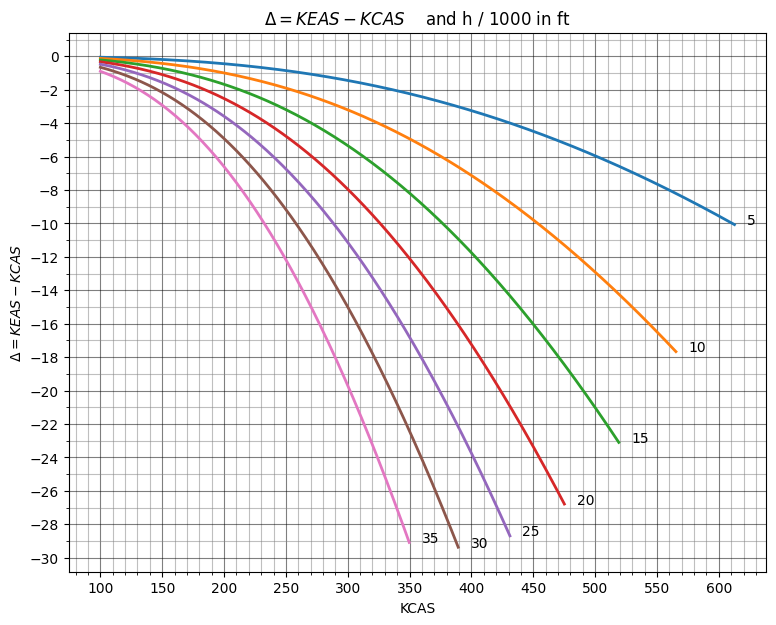

In [17]:
# just to run 
h_max = m2ft(11000)
print("hmax : %.1f ft" % h_max)

KCAS_table = np.linspace(100, 650, 501)
h_ft = np.linspace(5000, 35000, 7)
data = solve(h_ft, KCAS_table)

plot_diagram(data, 2)

**Commentaires**

Plus l'avion vole à haute altitude, plus l'erreur entre la la vitesse KEAS et KCAS est importante. Ceci est en accord avec l'explication dévelopée dans la partie précédente.

###  **<span style="color:magenta">Autres diagrammes</span>**

Regarder la méthode et faire les graphiques pour les autres options, 
ajouter un commentaire à chaque fois.

5.0 467
10.0 424
15.0 382
20.0 342
25.0 302
30.0 264
35.0 228


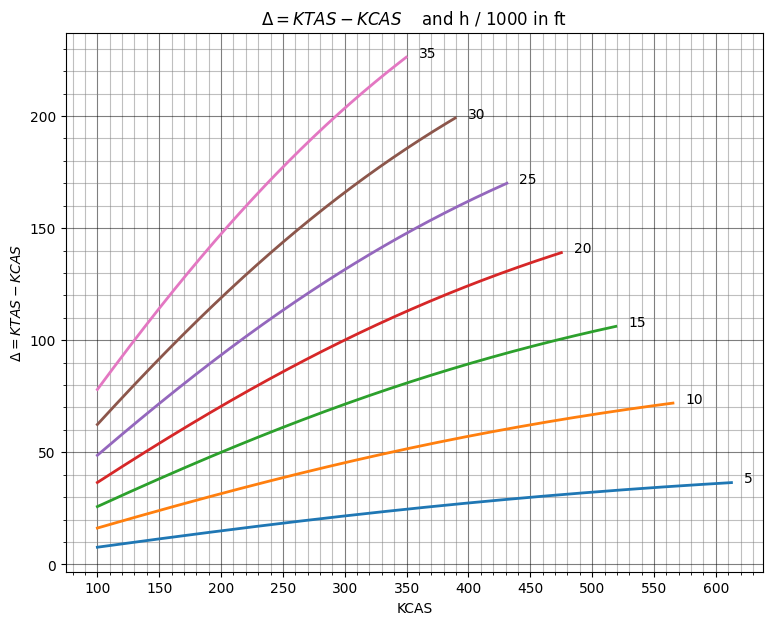

In [18]:
# to do

plot_diagram(data, 3)


**Commentaires**

L'observation est la même entre KTAS et KCAS.

5.0 467
10.0 424
15.0 382
20.0 342
25.0 302
30.0 264
35.0 228


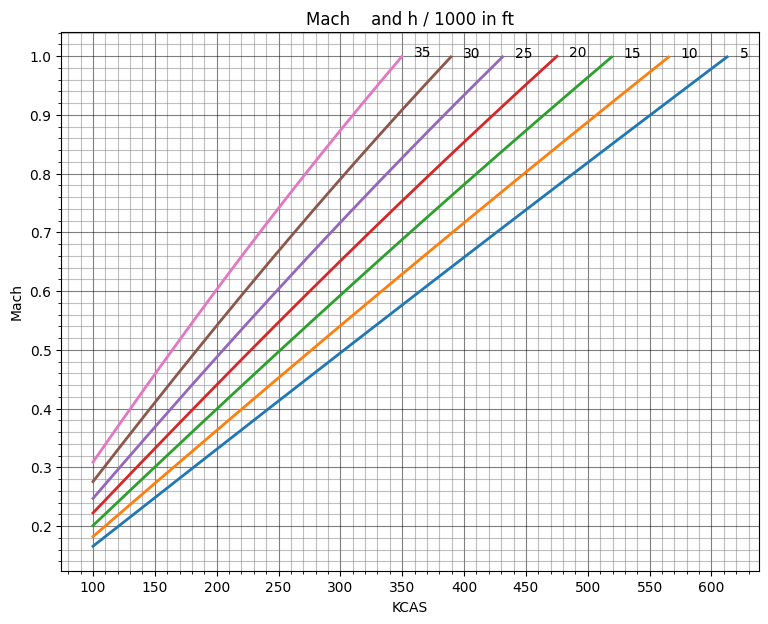

In [19]:
# to do
plot_diagram(data, 4)


**Commentaires**

Le nombre de Mach dépendant de la vitesse du son, la vitesse KCAS est plus importante à Mach équivalent à basse altitude.

5.0 467
10.0 424
15.0 382
20.0 342
25.0 302
30.0 264
35.0 228


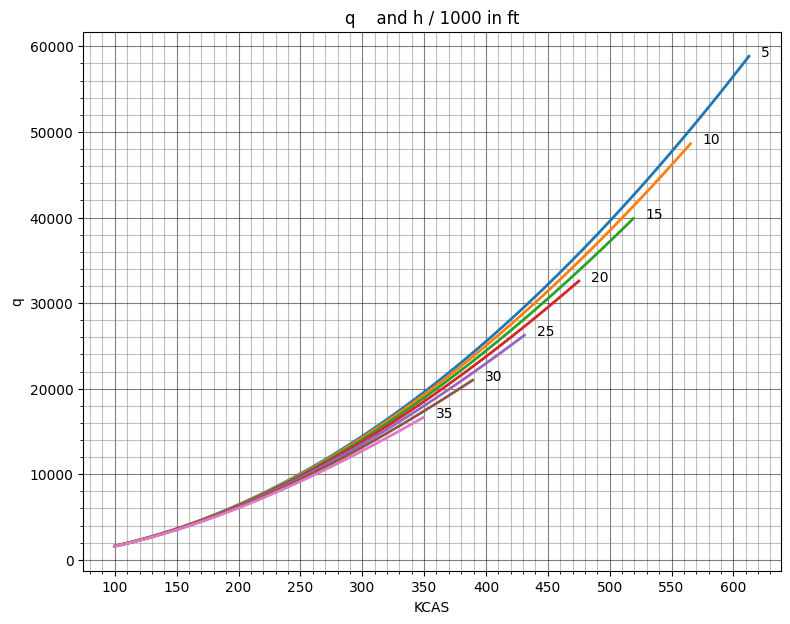

In [20]:
# to do
plot_diagram(data, 5)


**Commentaires**

Le lien entre pression dynamique et KCAS est sensiblement indépendant de l'altitude. 

# **<span style="color:red">V - Le nombre de Mach en écoulement supersonique</span>**

En écoulement supersonique on mesure avant tout un nombre de Mach puis on en déduit des vitesses.
Si l'avion est un vol dépassant Mach 1, un choc courbe assimilé à un choc droit se créée sur l'entrée du tube de Pitot.
Les pressions, vitesses et Mach mesurés sont donc ceux en aval d'un choc droit. Il faut donc retrouver les valeurs en amont
pour trouver la vrai vitesse de l'avion.


<img src="Images/tube_pitot_double.png" width="500">


On préfère, donc en supersonique utiliser un Machmètre: du tube de Pitot on récupère la pression d'arrêt, et 
la pression en amont de l'onde de choc est récupérée  $p_1$ par une autre prise de pression positionnée loin du tune de Pitot.

Le fonctionnement est décrit par l'image ci-dessous:

<img src="Images/MachPrincipe.png" width="500">
 

## **<span style="color:green">V-1 Eléments d'aérodynamique</span>**

Le calcul se fait très bien avec les théories de l'aérodynamique.


### Zone derrière le choc 

Dans **la zone derrière le choc l'écoulement est dit isentropique** (on conserve l'entropie)

On vérifie donc :

* que les grandeurs $p_i$ et  $T_i$ sont conservées dans cette zone

* les relations dites isentropiques:

$$
\dfrac{T}{T_i}= \left( 1 +\frac{\gamma-1}{2}M^2\right)^{-1} , \qquad \qquad  
\dfrac{p}{p_i}=  \varpi(M)=\left[\dfrac{T}{T_i}\right]^{\dfrac{\gamma}{\gamma-1}}=
    \left( 1 +\frac{\gamma-1}{2}M^2\right)^{-\dfrac{\gamma}{\gamma-1}}
$$



* De la dernière relation on peut calcuer un nombre de Mach

$$ 
M = \varpi^{-1}\left(\dfrac {p}{p_i}\right)=  \sqrt{\dfrac{2}{\gamma-1}\left[ \left(\dfrac{p}{p_{i}}\right)^{\dfrac{1-\gamma}{\gamma}}-1\right]} $$


Ces relations ont déjà été largement utilisées en écoulement subsonique compressible. 

On peut donc supposer, si le diamètre du tube de Pitot est très faible, que l'**état 2 est aussi l'état 1.**
Donc on oublie l'indice 2 pour employer uniquement l'indice 1.

    
### Relations à travers le choc, entre les zones amont 0 et la zone aval 1.

Les relations pour un choc droit, entre l'amont et l'aval sont données ici sous la forme classique:

* Relation entre les nombres de Mach, et entre les pressions statiques

<div class="alert alert-block alert-danger">
<b> Mach et rapport de pression statique à travers un choc droit </b>
$$ 
M ^{2}_{2} = \dfrac{2+(\gamma - 1) M^2_1}{2 \gamma M^2_1 - (\gamma-1)} \qquad \qquad
\dfrac{p_2}{p_1} = \frac {2 \gamma M^2_1 -(\gamma-1)}{\gamma + 1}$$
</div> 

* Relations entre les pressions isentropiques


<div class="alert alert-block alert-danger">
<b> Rapport des pression isentropiques à travers un choc droit </b>
$$
 \dfrac{p _{i_2}}{p _{i_1}} =  \dfrac{\rho _{i_2}}{\rho _{i_1}} =\left[\dfrac {2\gamma M^2_1
-(\gamma-1)}{\gamma + 1} \right]^{-\dfrac{1}{\gamma-1}} \left[\dfrac {(\gamma + 1)  M^2_1}{2+ (\gamma-1)M^2_1 } \right]^{ \dfrac{\gamma}{\gamma-1}} 
$$
</div> 

* Relations entre les températures, les masses volumiques et les vitesses

<div class="alert alert-block alert-info">
<b> Températures, masse volumiques et vitesses à travers un choc droit </b>
$$ T_{i_2} = T_{i_1},  \qquad \qquad \frac{T _2}{T _1} =  \frac {\left[2\gamma M^2_1 -(\gamma-1)\right]
\left[2+ (\gamma-1)M^{2}_{1}\right] }{\left(\gamma + 1 \right)^2 M^{2}_{1}}, \qquad \qquad
\frac{\rho _2}{\rho _1}  =  \frac {(\gamma + 1)  M^2_1}{2+ (\gamma-1)M^2_1 } = \frac{u_1}{u_2 }
$$
</div> 


* Dans notre cas on préfère la relation inversée sur les nombres de Mach:

<div class="alert alert-block alert-success">
<b> Mach amont en fonction du Mach aval à travers un choc droit </b>
$$M ^2_1=\dfrac{2+(\gamma - 1) M^2_2}{2 \gamma M^2_2 - (\gamma-1)}   \tag{éq. $M_{amont}$}$$
</div> 




## **<span style="color:green">V-2 Vitesse calibrée</span>**

La vitesse calibrée **CAS** est définie à partir du nombre de Mach pour les écoulements supersoniques:


<div class="alert alert-block alert-danger">
<b> CAS: Vitesse calibrée en supersonique </b>

$$
CAS = M_1 \times a_0  
$$
</div> 

On sait que la vitesse réelle est $TAS = M_1 \times a_1$ alors les relations suivantes:


<div class="alert alert-block alert-info">
<b>Relations supplémentaires pour la CAS</b>
    
$$
CAS = M_1 \times a_0 = TAS ~ \dfrac{a_0}{a_1} = TAS~\sqrt{\dfrac{T_0}{T_1}} = \dfrac{TAS}{\sqrt{\Theta}} 
$$
</div> 

On mesure $\Delta p = $ 
La vitesse calibrée mesurée à partir de la vitesse indiquée corrigée est calculée en fonction de la mesure du tube de Pitot double par

<div class="alert alert-block alert-danger">
<b> Variation de pression mesurée par un tube de Pitot</b>
    
$$
1 + \dfrac{\Delta p}{p_0} \approx \dfrac{p_{i_2}}{p_1}
$$
</div> 

Par les relations aérodynamiques on écrit:


$$
 \dfrac{p_{i_2}}{p_1} =   \dfrac{p_{i_2}}{p_{i_1}}~\dfrac{p_{i_1}}{p_1} =  \dfrac{p_{i_2}}{p_{i_1}} 
 \left( 1 +\frac{\gamma-1}{2}M_1^2\right)^{\dfrac{\gamma}{\gamma-1}} 
$$

\begin{eqnarray}
 \dfrac{p _{i_2}}{p _{i_1}}  &=&\left[\dfrac {2\gamma M^2_1
-(\gamma-1)}{\gamma + 1} \right]^{-\dfrac{1}{\gamma-1}} \left[\dfrac {(\gamma + 1)  M^2_1}{2+ (\gamma-1)M^2_1 } \right]^{ \dfrac{\gamma}{\gamma-1}} \\
&=& \left[\dfrac {\gamma-1}{\gamma + 1} \right]^{-\dfrac{1}{\gamma-1}}  \times 
 \left[\dfrac{2\gamma}{\gamma-1} M^2_1 -1 \right]^{-\dfrac{1}{\gamma-1}}  \times 
 \left[\dfrac {(\gamma + 1)}{2}\right]^{ \dfrac{\gamma}{\gamma-1}} \times
 \left[\dfrac {M^2_1}{1+ \dfrac{\gamma-1}{2}M^2_1 } \right]^{ \dfrac{\gamma}{\gamma-1}} 
\end{eqnarray}

Après simplication on trouve l'équation du Pitot double de Rayleigh:

<div class="alert alert-block alert-success">
<b>Relation de Rayleigh pour le pitot supersonique</b>
$$
\dfrac{p_{i_2}}{p_1} = \left[\dfrac {\gamma-1}{\gamma + 1} \right]^{-\dfrac{1}{\gamma-1}} \left[\dfrac {(\gamma + 1)}{2}\right]^{ \dfrac{\gamma}{\gamma-1}} \left[\dfrac{2\gamma}{\gamma-1} M^2_1 -1 \right]^{-\dfrac{1}{\gamma-1}}
M_1^{\dfrac{2\gamma}{\gamma-1}} 
$$
</div>

Si on pose $\gamma=1.4$ cette relation devient:
$$
\dfrac{p_{i_2}}{p_1} = 6^{5/2} 1.2^{7/2} \left[7 M^2_1 -1 \right]^{-5/2} M_1^7 = 1 + \dfrac{\Delta p}{p_0}
$$
on retrouve la relation donnée au début :

$$
6^{5/2} 1.2^{7/2}  M_1^7 =  \left(1 + \dfrac{\Delta p}{p_0}\right) \left[7 M^2_1 -1 \right]^{5/2}
$$
Cette équation se résout de manière itérative en démarrant avec $M_1$ = 1 puis en augmentant puisque $M_1 > 1$.

On trouve alors la vitesse $CAS = M_1 \times a_0$.

Ou bien on fait le même travail à partir de cette équation (la même après manipulations):

<div class="alert alert-block alert-success">
<b> Vitesse calibrée en supersonique </b>
 $$
 CAS = a_0 \left [\left(1 + \dfrac{q}{p_0} \right) \dfrac{\left(7 (CAS/a_0)^2-1\right)^{5/2}}{6^{5/2} 1.2^{7/2}}  \right] ^{1/7}
 $$
 </div>


Dans la réalité c'est légèrement différent. On pourra se renseigner si on est intéressé.

La valeur minimale de $\dfrac{p_{i_2}}{p_1}$ en supersonique est pour la valeur de $M_1=1$:

$$
\dfrac{p_{i_2}}{p_1}_{\min} = \left[\dfrac {(\gamma + 1)}{2}\right]^{ \dfrac{\gamma}{\gamma-1}} = 1 + \dfrac{\Delta p}{p_0} = 1.893
$$

Autrement dit si on obtient pas la mesure une valeur de $\Delta p < 0.893$ on sait que l'avion n'est pas encore en vol supersonique.

## **<span style="color:green">V-3 Méthodologie</span>**

Les instruments nous donnent :
1. La pression statique $p_1$ et la  pression d'arrêt : $p_{i_2}$.
2. Une jauge de température nous donne aussi $T_{i_2} = T_{i_1}$.

1: amont du choc, 2: aval du choc sur le tube de Pitot.

En fonction des données, doit adopter différentes stratégies de résolution.

Les codes sont disponibles dans le module. Il faut juste trouver la bonne méthode et l'implémenter ici.

On va considérer 3 cas:

1. on connaît: $h = 10000$ m et $M_1=1.8$
2. on connaît:  $p_2 = 119000$ Pa, $q_{c_2} = 30000$ Pa et $T_{i_2} = 401.7$ K
3. on connaît: $\dfrac{\Delta p}{p_0} = 4.1$, $p_1 = 28000$ Pa et  $T_{i_1} = 402$ K

Il faut sortir toutes les grandeurs pour l'état 1 et 2, ainsi que les valeurs relatives à l'atmosphère pour les 3 cas.

Ensuite il faut écrire des commentaires.


## Cas 1

**Commentaires** 



In [21]:
# cas 1: code

# h = 10000 et M = 1.8
M_C1 = 1.8
h_C1 = 10000

h = 10000
M_1 = 1.8
p_0, T_0, rho_0 = set_sea_level_state(r_ref, t_0=15)
a_0 = sound_velocity(T_0)
Theta, delta, sigma = atmos(h)
T_1 = Theta * T_0
p_1 = delta * p_0
rho_1 = sigma * rho_0
T_i1 = T_1 / T_Ti(M_1)
p_i1 = p_1 / p_pi(M_1)
a_1 = sound_velocity(T_1)
v_1 = M_1 * a_1
        
T_i2 = T_i1  
p_2 = p_1 * P2_P1(M_1)
p_i2 = p_i1 * pi2_pi1(M_1)
qc2 = p_i2 - p_2
M_2 = downstream_Mach(M_1)
T_2 = T_i1 * T_Ti(M_2)
a_2 = sound_velocity(T_2)
v_2 = M_2 * a_2     
rho_2 = p_2 / (r_ref * T_2)
q_1 = q_from_Mach(M_1, p_1) 
q_2 =  q_from_Mach(M_2, p_2)
        
delta_p = (p_i2 / p_1 -1) * p_0
CAS_1 = M_1 * a_0
        
# OUTPUTS: 
display_atmosphere(m2ft(h), delta, sigma, Theta)
   
print("\n Downstream the shock wave: \n")
       
display_state(msg='state 2', p=p_2, rho=rho_2, T=T_2, a=a_2)
display_state_plus(Mach=M_2, T_i=T_i2, p_i=p_i2, u=v_2)
display_dynamic_pressure(M=M_2, q=q_2, qc=p_i2 - p_2)
        
print("\n Upstream the shock wave: \n")
        
display_state(msg='state 1', p=p_1, rho=rho_1, T=T_1, a=a_1)
display_state_plus(Mach=M_1, T_i=T_i1, p_i=p_i1, u=v_1)
display_dynamic_pressure(M=M_1, q=q_1, qc=p_i1 - p_1)
display_pitot_tube(M_1, p_i2 / p_1, delta_p, CAS_1)

rho_0    1.225 kg/m^3

Standard atmosphere
  h [ft]    p / p_0    rho / rho_0    T / T_0 
               δ            σ            Θ
--------------------------------------------------
  32808      0.2609     0.3369         0.7744 

 Downstream the shock wave: 


# 	 state 2
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 95522.61     0.9737       370.61    341.77      68.62 

  Mach      T_i [K ]        p_i [Pa]    u [km/h]    u [kt]
------------------------------------------------------------
   0.62     367.7512       123444.00    822.52      444.13

  Mach        q [Pa]        q_c [Pa]    q / p_0     q_c / p_0
-----------------------------------------------------------------
  0.617      25413.949     27921.389     0.251       0.276

 Upstream the shock wave: 


# 	 state 1
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 26436.15     0.4127 

## Cas 2

**Commentaires** 



In [22]:
# cas 2: code

p2_C2 = 119000
qc2_C2 = 30000
Ti2_C2 = 401.7

from flight._main_ import *
main(4)



rho_0    1.225 kg/m^3
h       :  9996.0042781463

Standard atmosphere
  h [ft]    p / p_0    rho / rho_0    T / T_0 
               δ            σ            Θ
--------------------------------------------------
  32795      0.2611     0.3371         0.7745 

 Downstream the shock wave: 


# 	 state 2
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 118960.00     1.1004       389.03    376.59     103.44 

  Mach      T_i [K ]        p_i [Pa]    u [km/h]    u [kt]
------------------------------------------------------------
   0.58     401.7000       149110.00    808.60      436.61

  Mach        q [Pa]        q_c [Pa]    q / p_0     q_c / p_0
-----------------------------------------------------------------
  0.577      27758.877     30150.000     0.274       0.298

 Upstream the shock wave: 


# 	 state 1
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------

## Cas 3

**Commentaires** 



In [23]:
# cas 3: code

# Tube de Pitot en supersonique, on a Delta p / p_0
p_0, T_0, rho_0 = set_sea_level_state(r_ref, t_0=15)
a_0 = sound_velocity(T_0)
# Downstream the shock 
r = 4.1   # Delta_p / p_0
delta_p = r * p_0
p_1 = 28000
T_i2 = T_i1 = 402
        
M_1 = M1_from_Delta_p(r=r, gamma=1.4)
CAS_1 = M_1 * a_0
T_1 = T_Ti(M_1) * T_i1
a_1 = sound_velocity(T_1)
v_1 = M_1 * a_1
p_i1 = p_1 / p_pi(M_1)
rho_1 = p_1 / (r_ref * T_1)
        
M_2 = downstream_Mach(M_1)
p_i2 = p_i1 * pi2_pi1(M_1)
p_2 = p_1 * P2_P1(M_1) 
T_2 = T_Ti(M_2) * T_i2
rho_2 = p_2 / (r_ref * T_2)
a_2 = sound_velocity(T_2)
v_2 = M_2 * a_2
        
h = h_from_temperature(T_1 / (T_ref + 15))
q_1 = q_from_Mach(M_1, p_1) 
q_2 =  q_from_Mach(M_2, p_2)
        
print("h       : ", h)
Theta, delta, sigma = atmos(h)
        
# OUTPUTS: 
display_atmosphere(m2ft(h), delta, sigma, Theta)
   
print("\n Downstream the shock wave: \n")
       
display_state(msg='state 2', p=p_2, rho=rho_2, T=T_2, a=a_2)
display_state_plus(Mach=M_2, T_i=T_i2, p_i=p_i2, u=v_2)
display_dynamic_pressure(M=M_2, q=q_2, qc=p_i2 - p_2)
        
print("\n Upstream the shock wave: \n")
    
display_state(msg='state 1', p=p_1, rho=rho_1, T=T_1, a=a_1)
display_state_plus(Mach=M_1, T_i=T_i1, p_i=p_i1, u=v_1)
display_dynamic_pressure(M=M_1, q=q_1, qc=p_i1 - p_1)
display_pitot_tube(M_1, p_i2 / p_1, delta_p, CAS_1)

rho_0    1.225 kg/m^3
h       :  [8278.53255516]

Standard atmosphere
  h [ft]    p / p_0    rho / rho_0    T / T_0 
               δ            σ            Θ
--------------------------------------------------
  27160      0.3374     0.4149         0.8133 

 Downstream the shock wave: 


# 	 state 2
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------------
 112191.73     1.0416       388.32    375.23     102.08 

  Mach      T_i [K ]        p_i [Pa]    u [km/h]    u [kt]
------------------------------------------------------------
   0.60     402.0000       142800.00    835.01      450.87

  Mach        q [Pa]        q_c [Pa]    q / p_0     q_c / p_0
-----------------------------------------------------------------
  0.597      28019.173     30608.273     0.277       0.302

 Upstream the shock wave: 


# 	 state 1
  p [Pa]     rho [kg/m^3]   a [m/s]   T [K]     theta [°]
------------------------------------------------------

# Conclusion du TP:




Ce TP a mis en lumière toute la complexité de la mesure de la vitesse d'un avion. Les très nombreux phénomènes physiques se manifestant lors d'un vol supersonique rendent nécessaire d'adapter les capteurs présents sur l'avion pour lier ce qu'il se passe autour de l'avion à son environnement. 